# 합성곱 신경망(CNN)

- 인근 값들을 묶어서 계산해볼까 하는 뉴럴 네트워크
- 특히 사진은 인근 값들이 연관성이 있기 때문에..
- 필터 (혹은 커널)을 하나의 묶음으로 본다

## 패딩
여유공간을 둬서 학습을 여러번 할 수 있게 만든 것

![패딩](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAL2JGTMS9y55Iq6KgAkjGbvL4alzpY6IZdg&s)

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 각 픽셀을 0~1사이의 실수값으로 변경하기 위함이다
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [4]:
# 이제 합성곱 신경망을 만들어보자 Conv2D
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
# 필터(특성)를 32개, 커널사이즈=3*3의 도장사이즈, 렐루함수로 0이하는 버리고, 28*28의 같은사이즈로 패딩 만들고싶어
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation='softmax')) # 여기 식은 아웃풋으로 정해진 식이라고 봐야한다. 10개를 분류하겠다고 우리가 정했기 때문에

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(patience=2)
result = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[es])

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7823 - loss: 0.6078 - val_accuracy: 0.8849 - val_loss: 0.3328
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8964 - loss: 0.2840 - val_accuracy: 0.8991 - val_loss: 0.2822
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9099 - loss: 0.2440 - val_accuracy: 0.9088 - val_loss: 0.2526
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9254 - loss: 0.2029 - val_accuracy: 0.9109 - val_loss: 0.2446
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9334 - loss: 0.1780 - val_accuracy: 0.9031 - val_loss: 0.2800
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9442 - loss: 0.1529 - val_accuracy: 0.9215 - val_loss: 0.2316
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9553 - loss: 0.1223 - val_accuracy: 0.9187 - val_loss: 0.2330
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9612 - loss: 0.10

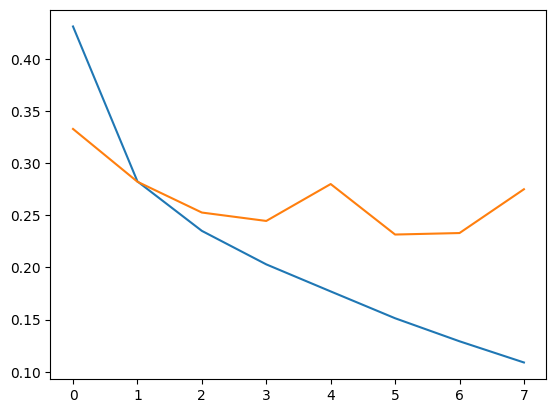

In [8]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [9]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9164 - loss: 0.2656


[0.27497559785842896, 0.914733350276947]

In [10]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9098 - loss: 0.3055


[0.2883816361427307, 0.9136000275611877]